RNNoise is a recurrent neural network with GRU cells designed to suppress noise in real-time audio recording.

RNNoise_Wrapper simplifies RNNoise: relieves the user from having to extract the frames/images from audio, removes restrictions on the parameters of the processed wav audio, hides all nuances of operation with library in C and, if using Linux or Mac, eliminating the need to manually compile RNNoise.
Many thanks : https://github.com/Desklop/RNNoise_Wrapper

In [91]:
!pip install git+https://github.com/Desklop/RNNoise_Wrapper

  Cloning https://github.com/Desklop/RNNoise_Wrapper to /tmp/pip-req-build-flpqtel4
  Created wheel for rnnoise-wrapper: filename=rnnoise_wrapper-1.0-py3-none-any.whl size=157363 sha256=9da687ba6621e3bdadf43f0e857a1146be38b58daa550abcdff53768db74be8e
  Stored in directory: /tmp/pip-ephem-wheel-cache-4i44k88c/wheels/de/65/53/050717d5741887426e2b459deaf5ec157761b8f04aae557034
Successfully built rnnoise-wrapper


In [92]:
import librosa
import librosa.display as display
import pandas as pd
import soundfile as sf

from IPython.display import Audio
from pathlib import Path

import IPython
import matplotlib.pyplot as plt
import scipy.signal

**Orginal**

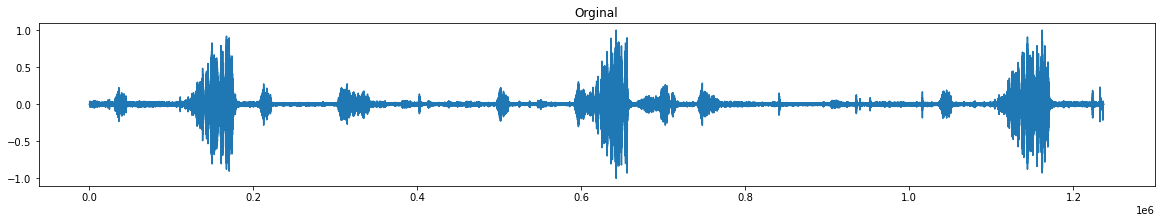

In [93]:
noise_path='../input/birdsong-resampled-train-audio-00/aldfly/XC179417.wav'
noise_clip , sr = librosa.load(noise_path, sr=32000)

fig, ax = plt.subplots(figsize=(20,3))
ax.plot(noise_clip)
ax.title.set_text('Orginal')
IPython.display.Audio(data=noise_clip, rate=sr)

**denoiser**

In [94]:
denoiser = RNNoise()

audio = denoiser.read_wav('../input/birdsong-resampled-train-audio-00/aldfly/XC179417.wav')
filtered_audio = denoiser.filter(audio)
denoiser.write_wav('test_denoised.wav', filtered_audio)

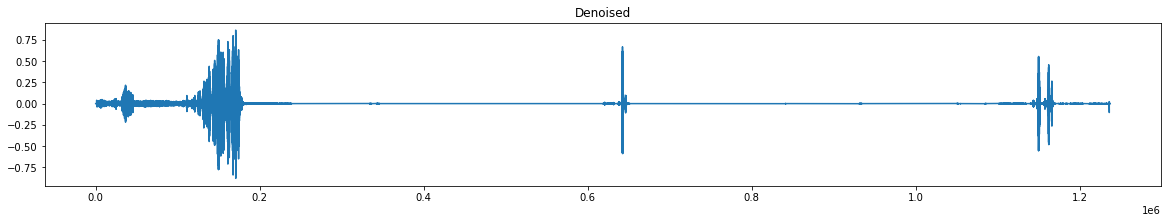

In [95]:
noise_path='./test_denoised.wav'
noise_clip , sr = librosa.load(noise_path, sr=32000)

fig, ax = plt.subplots(figsize=(20,3))
ax.plot(noise_clip)
ax.title.set_text('Denoised')
IPython.display.Audio(data=noise_clip, rate=sr)

**filtered_audio**

Noise reduction in streaming audio (the buffer size is 10 milliseconds, i.e. 1 frame) (the example uses stream simulation by processing the test.wav audio recording in parts and saving the result as test_denoised_f. wav)

In [96]:
audio = denoiser.read_wav('../input/birdsong-resampled-train-audio-00/aldfly/XC179417.wav')

filtered_audio = b''
buffer_size_ms = 10

for i in range(buffer_size_ms, len(audio), buffer_size_ms):
    filtered_audio += denoiser.filter(audio[i-buffer_size_ms:i].raw_data, sample_rate=audio.frame_rate)
if len(audio) % buffer_size_ms != 0:
    filtered_audio += denoiser.filter(audio[len(audio)-(len(audio)%buffer_size_ms):].raw_data, sample_rate=audio.frame_rate)

denoiser.write_wav('test_denoised_f.wav', filtered_audio, sample_rate=audio.frame_rate)

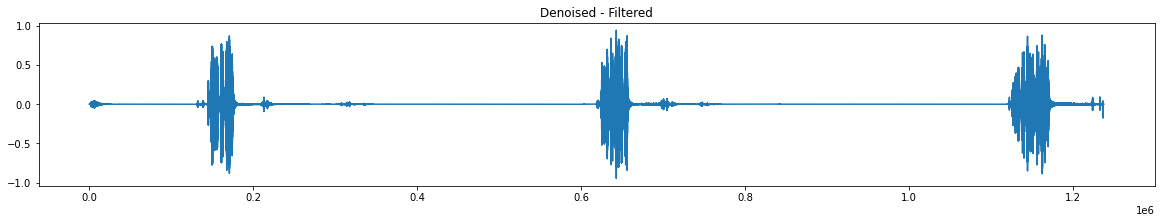

In [97]:
noise_path='./test_denoised_f.wav'
noise_clip , sr = librosa.load(noise_path, sr=32000)

fig, ax = plt.subplots(figsize=(20,3))
ax.plot(noise_clip)
ax.title.set_text('Denoised - Filtered')
IPython.display.Audio(data=noise_clip, rate=sr)